**Chapter 1.1 – Our first machine learning model**

*This introductory case is not in the book*. 

***Content***
1. The problem we want to solve.
2. Get the data.
3. Discover and visualize the data.
4. Select a model and train it.
5. Use the model
6. Exercise

# 0. Setup Python

First, let's import a few common modules and ensure MatplotLib plots figures inline. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.11 is required
import sys
assert sys.version_info >= (3, 11)

# Scikit-Learn ≥1.6 is required
import sklearn
assert sklearn.__version__ >= "1.8.0"
print(sklearn.__version__)

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt


1.8.0


# 1. The problem we want to solve
Predict future temperatures in Brussels in spring based on temperature registrations since 1833.

Before you continue, ask yourself: 
- What are the instances? 
- Which techniques to use? 
    - reinforcement learning?
    - (un)supervised learning? 
    - classification/regression? 
    - batch/online learning? 




Answers: 
- instances = years
- techniques
    - supervised learning: temperature = label
    - regression: predicting a number
    - univariate regression: predicting single value per year
    - batch learning: no continuous flow of new data

# 2. Get the Data

## Download the Data

Governments and major cities provides lots op open data that can be freely used for analyses:
- data.vlaanderen.be: Flemish government
- data.gov.be: Belgian government
- data.gent.be: city of Gent
- ...

We find average seasonal temperatures in Ukkel (Brussels) at https://www.vlaanderen.be/DataCatalogRecord/72ff6930-87e4-38c4-9a27-d3ddda385637. 

The download link for the spring data (as a csv file) is:
https://www.vmm.be/klimaat/seizoensgemiddelde-temperatuur/lente-temp/@@download/csv

Download the file and place it in a subdirectory "datasets" from directory where this notebook resides. 

Read and explore the dataset in a pandas dataframe:

In [17]:
csv_path = 'datasets/lente temp.csv'
temperatures = pd.read_csv(csv_path)
temperatures.head(10)


,jaar,95 %-betrouwbaarheidsinterval van punten op de trendlijn,gemiddelde van de gemeten waarden,trendlijn
0,1833,"(8.411, 7.199)",8.3,7.805
1,1834,"(8.383, 7.239)",9.0,7.811
2,1835,"(8.356, 7.278)",7.7,7.817
3,1836,"(8.333, 7.313)",8.2,7.823
4,1837,"(8.311, 7.347)",4.9,7.829
5,1838,"(8.292, 7.378)",7.5,7.835
6,1839,"(8.277, 7.407)",6.6,7.842
7,1840,"(8.263, 7.435)",7.7,7.849
8,1841,"(8.254, 7.458)",10.5,7.856
9,1842,"(8.245, 7.481)",8.3,7.863


In [18]:
temperatures.tail()

,jaar,95 %-betrouwbaarheidsinterval van punten op de trendlijn,gemiddelde van de gemeten waarden,trendlijn
188,2021,"(11.349, 10.385)",8.8,10.867
189,2022,"(11.411, 10.391)",11.3,10.901
190,2023,"(11.475, 10.397)",10.2,10.936
191,2024,"(11.543, 10.399)",11.7,10.971
192,2025,"(11.614, 10.398)",11.8,11.006


We need only the column "jaar" and "gemiddelde van de gemeten waarden". 

In [19]:
temperatures = temperatures[['jaar','gemiddelde van de gemeten waarden']]

In [20]:
temperatures.head()

,jaar,gemiddelde van de gemeten waarden
0,1833,8.3
1,1834,9.0
2,1835,7.7
3,1836,8.2
4,1837,4.9


We rename the columns for easier use.

In [21]:
temperatures = temperatures.rename(columns={"jaar": "year", "gemiddelde van de gemeten waarden": "temp"})

## Take a Quick Look at the Data Structure

In [22]:
2025-1833+1

193

In [23]:
temperatures.info()

<class 'pandas.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    193 non-null    int64  
 1   temp    193 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.1 KB


Observations: 
- 193 years in the dataset (1833-2025)
- no years or temperatues are missing
- all temp values are numeric --> clean data

# 3. Discover and Visualize the Data to Gain Insights

In [24]:
temperatures.head()

,year,temp
0,1833,8.3
1,1834,9.0
2,1835,7.7
3,1836,8.2
4,1837,4.9


In [25]:
temperatures.tail()

,year,temp
188,2021,8.8
189,2022,11.3
190,2023,10.2
191,2024,11.7
192,2025,11.8


The describe() method shows a summary of
the numerical attributes

In [26]:
temperatures.describe()

,year,temp
count,193.000000,193.000000
mean,1929.000000,8.906736
std,55.858452,1.316010
min,1833.000000,4.900000
25%,1881.000000,8.000000
50%,1929.000000,8.800000
75%,1977.000000,9.700000
max,2025.000000,12.300000


## Plot the data in a line chart

Text(0, 0.5, 'Average Spring Temperature in Brussels (°C)')

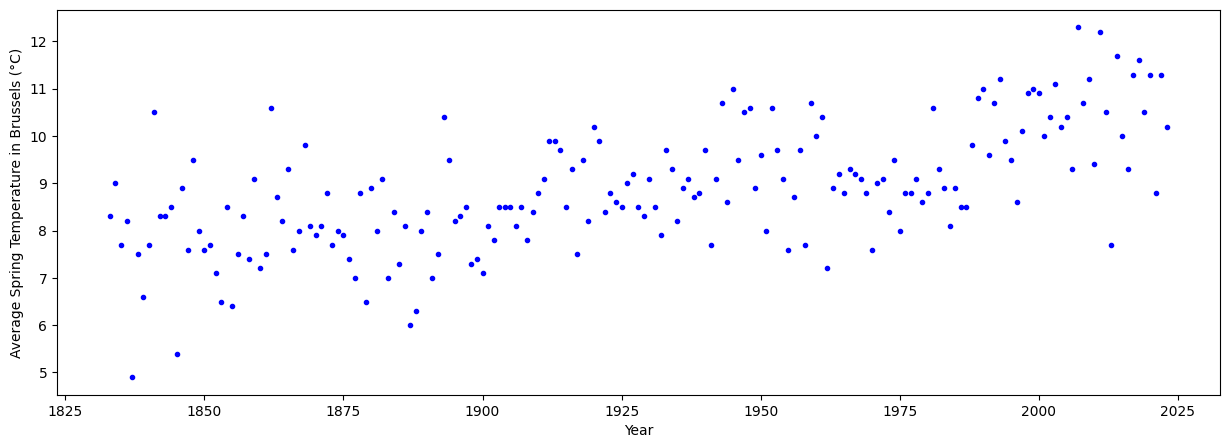

In [12]:
plt.subplots(figsize=(15,5))
plt.plot(temperatures['year'],temperatures['temp'],'b.')
plt.xlabel("Year")
plt.ylabel("Average Spring Temperature in Brussels (°C)")

# 4. Select and Train a Model

We assume their is a linear relationship between the year and the temperature. We can use Linear Regression to find the optimal straight line through the data points. 

Performing Linear Regression using Scikit-Learn is simple:

In [27]:
from sklearn.linear_model import LinearRegression

# create an instance of the linear regression class
lin_reg = LinearRegression()  

# Fit the model to the data: calculate the parameters of the data using the appropriate mathematical algorithms. This is where the real work happens. 
lin_reg.fit(pd.DataFrame(temperatures['year']), temperatures['temp'])  # LinearRegression.fit() works only with a dataframe as first parameter

# Ask the fitted model for the calculated parameters
lin_reg.intercept_, lin_reg.coef_ 

(np.float64(-20.416658264782875), array([0.01520134]))

`intercept`: interception of the line with the Y axis   
`coef`: slope or gradient of the curve. In this case it means there is, since 1833, an average yearly increase of 0.015 °C. 

## 5. Use the model (aka model inference)

**Model inference** is the process of using a trained machine learning model to make predictions, classifications, or decisions on new, unseen, real-world data.

It's easy to visualize the fitted line: just predict two x values

In [29]:
years = np.array([[1800], [2100]])
temps = lin_reg.predict(years)
temps

c:\REPOS\course\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 6.94576228, 11.5061657 ])

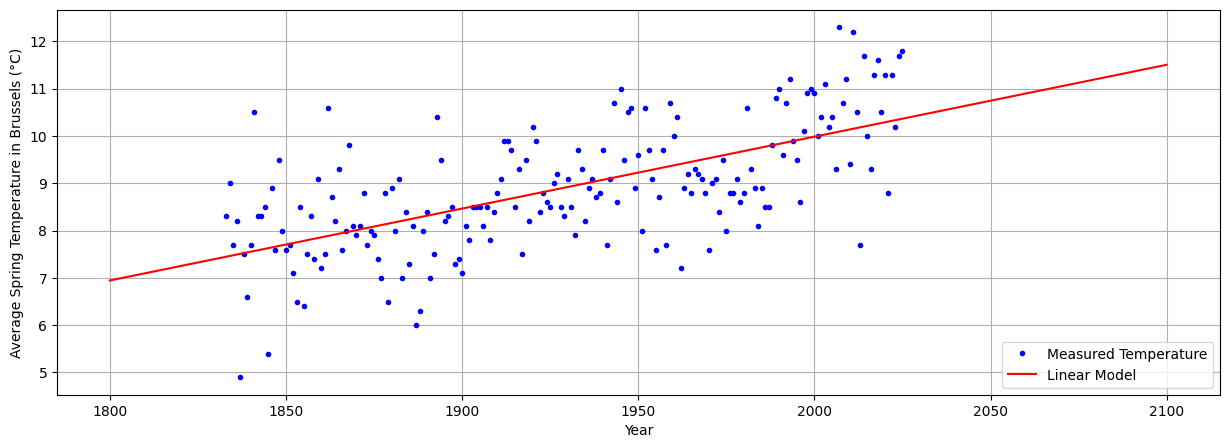

In [30]:
plt.subplots(figsize=(15,5))
plt.plot(temperatures['year'],temperatures['temp'],'b.',label='Measured Temperature')
plt.plot(years, temps, "r-",label='Linear Model')
plt.xlabel("Year")
plt.ylabel("Average Spring Temperature in Brussels (°C)")
plt.grid()
plt.legend(loc='lower right')

The central objective of the Paris Agreement is its long-term temperature goal to hold global average temperature increase to “well below 2°C above preindustrial levels and pursuing efforts to limit the temperature increase to 1.5°C above pre-industrial levels”.  (see https://climateactiontracker.org/global/cat-thermometer/)

If we assume 1850 is pre-industrial, by how much will, according to our model, the temperature (Brussels, spring) increase by 2100? 

In [31]:
years = np.array([[1850], [2100]])
temps = lin_reg.predict(years)
increase = temps[1] - temps[0]
increase

c:\REPOS\course\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(3.800336186635331)

# 6. Exercise

- Download the summer temperatures from the same website as above. 
- Create a model for the temperatures. Do you get similar results?
- Maybe things are getting even worse since approximately 1950. Find a way to check that. 
